In [1]:
#libraries
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import poisson

In [2]:
# Set global theme settings for plotting
plt.rcParams.update({
    'font.size': 20,          # Set font size
    'lines.linewidth': 3,     # Set default line thickness
    'axes.titlesize': 20,     # Title font size
    'axes.labelsize': 18,     # Axis label font size
    'xtick.labelsize': 14,    # X-tick label font size
    'ytick.labelsize': 14,    # Y-tick label font size
    'grid.color': 'gray',     # Grid color
    'grid.linestyle': '--',   # Grid line style
    'grid.linewidth': 0.5,    # Grid line width
    'legend.fontsize': 16     # Legend font size
})

In [3]:
sd = -0.009

Alldata = pd.read_csv('solutions_data.csv', header=None)
Alldata.columns = ['Epsilon', 'xmean', 'R', 'E_minx', 'StdErr_minx', 'Fitnessbest', 'Selectivedeaths']

Multdata = pd.read_csv('Multsolutions_data.csv', header=None)
Multdata = Multdata.T
Multdata.columns = ['Multxmean', 'MultMinimumx', 'MultStdErrMinimumx', 'MultBestFitness', 'MultSelectiveDeath']

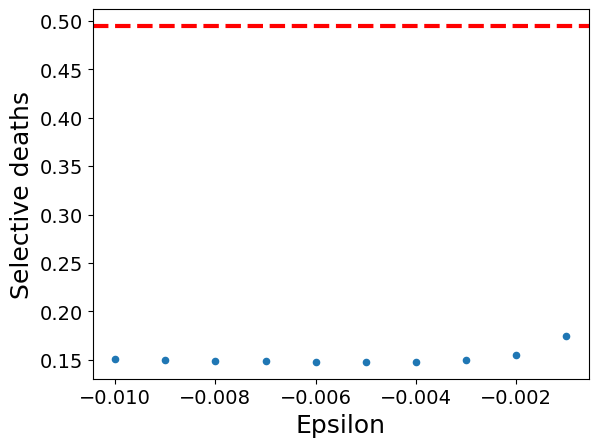

In [14]:
Alldata.plot(x='Epsilon', y='Selectivedeaths', kind='scatter')
plt.axhline(y=Multdata.MultSelectiveDeath[0], color='r', linestyle='--')
plt.ylabel('Selective deaths')
plt.savefig('graphs/selectivedeaths_epsilon.png', bbox_inches='tight') 

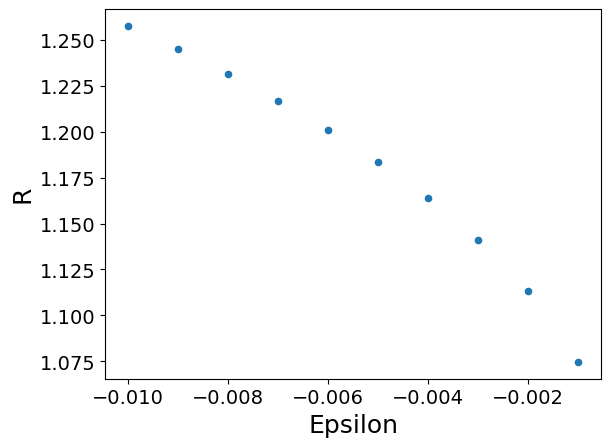

In [6]:
Alldata.plot(x='Epsilon', y='R', kind='scatter')
plt.show() 

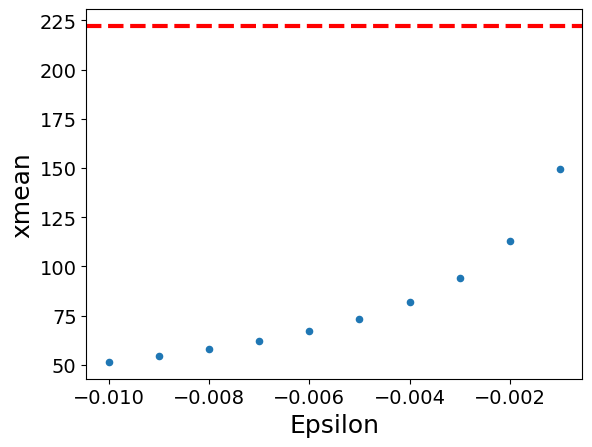

In [9]:
Alldata.plot(x='Epsilon', y='xmean', kind='scatter')
plt.axhline(y=Multdata.Multxmean[0], color='r', linestyle='--')
plt.savefig('graphs/xmean_epsilon.png', bbox_inches='tight') 

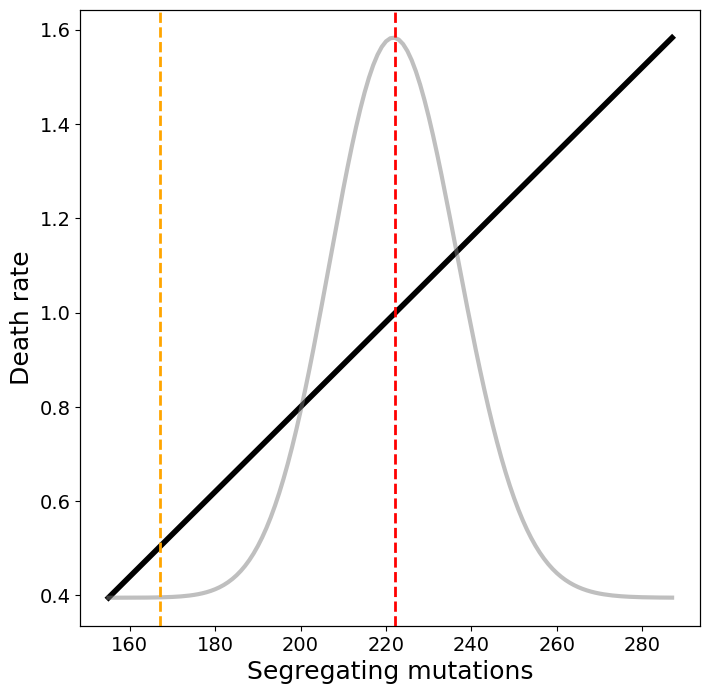

In [72]:
#Plot the death rate function for the multiplicative model
xValues = pd.Series(pd.RangeIndex(start=int(0.7*Multdata.Multxmean[0]), stop=int(1.3*Multdata.Multxmean[0]), step=1))
MultdeathRates = 1.0-sd*(xValues - Multdata.Multxmean[0])
# poisson distribution data for y-axis
PoissonPMF = poisson.pmf(xValues, mu=Multdata.Multxmean[0], loc=0)

COLOR_DEATHRATE = "black"
COLOR_PMF = "gray"

fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()

ax1.plot(xValues, MultdeathRates, color=COLOR_DEATHRATE, lw=4)
ax1.set_ylabel('Death rate')
ax1.set_xlabel('Segregating mutations')

ax2.plot(xValues, PoissonPMF,  color=COLOR_PMF, alpha=0.5)
ax2.axvline(x=Multdata.Multxmean[0], color='r', linestyle='--', lw=2)
ax2.axvline(x=Multdata.MultMinimumx[0], color='orange', linestyle='--', lw=2)
ax2.get_yaxis().set_visible(False)

plt.show()

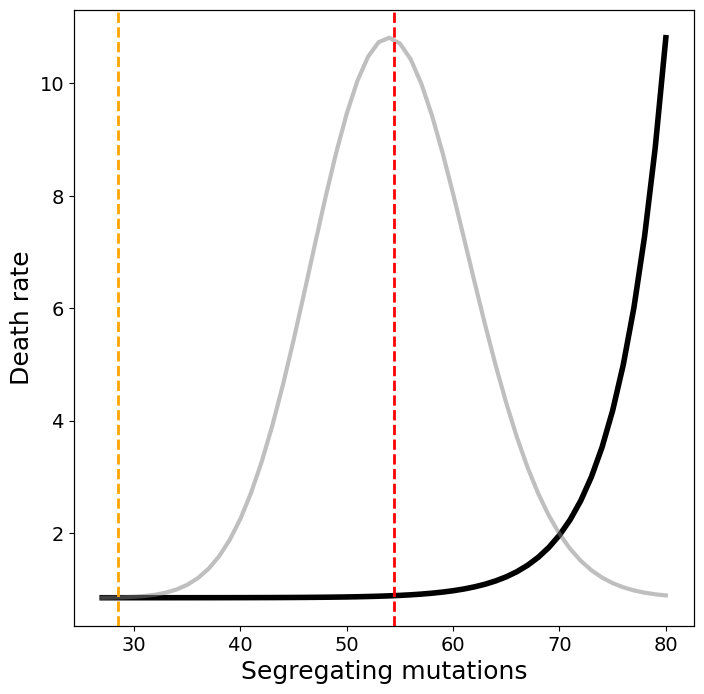

In [75]:
#Work on this
#Plot the death rate function for the epistasis model
i=1
xValues = pd.Series(pd.RangeIndex(start=int(0.5*Alldata.xmean[i]), stop=int(1.5*Alldata.xmean[i]), step=1))
DeathRates = 1.0-(sd/(Alldata.R[i]**Alldata.xmean[i]))*(1/(Alldata.R[i]-1.0))*(Alldata.R[i]**xValues - np.exp(Alldata.xmean[i]*(Alldata.R[i]-1.0)))
# poisson distribution data for y-axis
PoissonPMF = poisson.pmf(xValues, mu=Alldata.xmean[i], loc=0)

COLOR_DEATHRATE = "black"
COLOR_PMF = "gray"

fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()

ax2.plot(xValues, PoissonPMF,  color=COLOR_PMF, alpha=0.5)
ax2.axvline(x=Alldata.xmean[i], color='r', linestyle='--', lw=2)
ax2.axvline(x=Alldata.E_minx[i], color='orange', linestyle='--', lw=2)
ax2.get_yaxis().set_visible(False)

ax1.plot(xValues, DeathRates, color=COLOR_DEATHRATE, lw=4)
ax1.set_ylabel('Death rate')
ax1.set_xlabel('Segregating mutations')

plt.show()


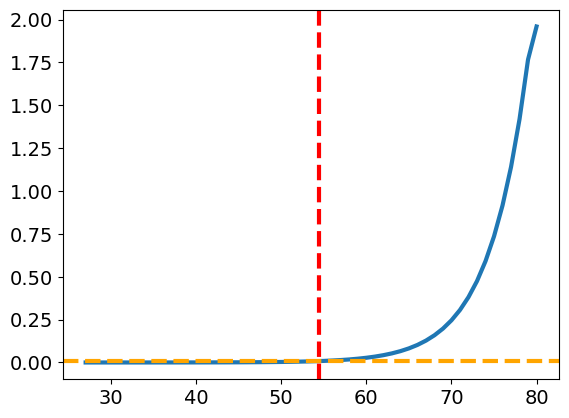

In [53]:
#Compute the derivate of MultdeathRates, that is the selection coefficient of a new mutations given a genetic background xValues
SelDeathRates = np.gradient(DeathRates, xValues)
plt.plot(xValues, SelDeathRates)
plt.axvline(x=Alldata.xmean[i], color='r', linestyle='--')
plt.axhline(y=(-sd), color='orange', linestyle='--')
